# Moving Average (MA)

Moving Average, MA, Simple Moving Average, SMA. They all mean the same.

### Why is it important?
- Helps us forecast whether the price would increase or decrease.
- Helps us determine possible future patterns.

### Definition
- An indicator used to identify the direction of a current price trend, without the interference of shorter-term price spikes.
- The MA indicator combines price points of a financial instrument over a specified time frame and divides it by the number of data points to present a single trend line.

### ETC
- The data used depends on the length of the MA. (i.e. 200-day MA requires 200 days of data.)

### Reference
- https://www.ig.com/us/trading-strategies/10-trading-indicators-every-trader-should-know-190604?&CHID=1&QPID=2934542669&QPPID=1&gclid=CjwKCAjwhYOFBhBkEiwASF3KGdb375kr_k_y4GHnpWTXzmy5DgPv1ajqEpGhk7NsD7vOmb3poDrIcxoCIjQQAvD_BwE&gclsrc=aw.ds

In [13]:
# This is not recommended if you use conda/anaconda
# (https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)
# !pip install pandas_datareader

In [10]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style

In [6]:
start_date = datetime.datetime(2005, 1, 1)
end_date = datetime.datetime.now()

In [7]:
google = web.DataReader('GOOGL', 'yahoo', start_date, end_date)
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,101.921921,97.827827,98.798798,101.456459,31656712.0,101.456459
2005-01-04,101.566566,96.836838,100.800804,97.347343,27484288.0,97.347343
2005-01-05,98.548546,96.211212,96.821823,96.851852,16456727.0,96.851852
2005-01-06,98.048050,93.953957,97.637634,94.369370,20753426.0,94.369370
2005-01-07,97.222221,94.484482,95.415413,97.022018,19306474.0,97.022018


In [11]:
n_days = 100
close_px = google['Adj Close']
mavg = close_px.rolling(window=n_days).mean() # moving average
mavg.tail(10)

Date
2021-05-03    2002.865496
2021-05-04    2007.820497
2021-05-05    2013.189597
2021-05-06    2018.886598
2021-05-07    2024.657897
2021-05-10    2030.052797
2021-05-11    2035.142598
2021-05-12    2039.573198
2021-05-13    2044.458499
2021-05-14    2049.980098
Name: Adj Close, dtype: float64

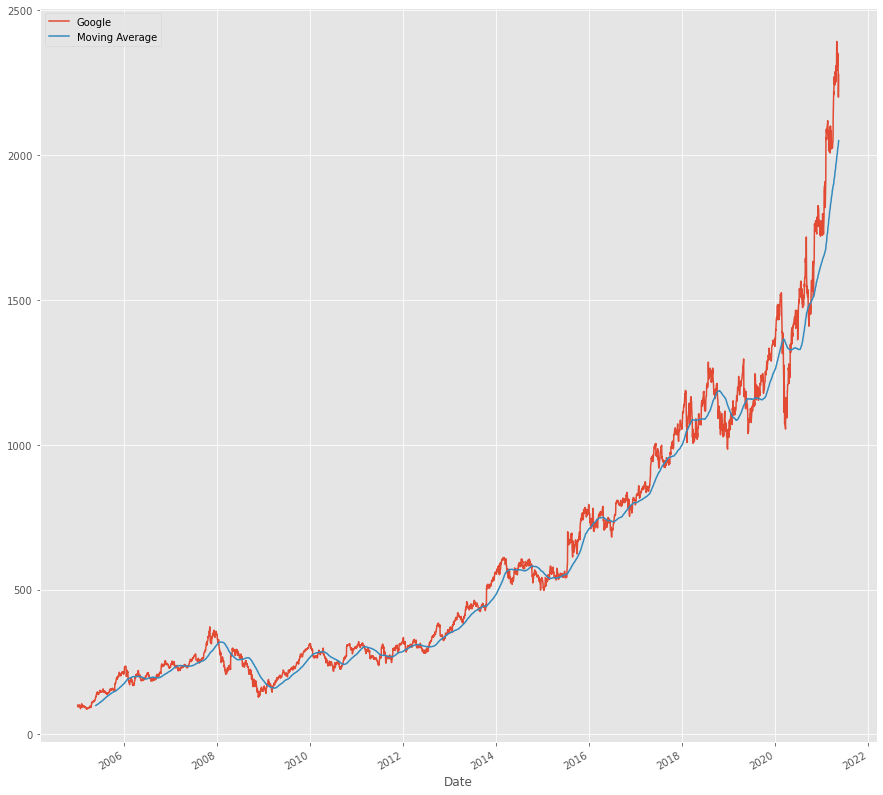

In [16]:
mpl.rc('figure', figsize=(15,15))
style.use('ggplot')
close_px.plot(label='Google')
mavg.plot(label='Moving Average')
plt.legend()
plt.show()

Let's look at only relatively recent data

In [25]:
def calculate_ma(start_date, end_date, company_symbol, ma_n_days=100):
    '''
    params:
        start_date (datetime): i.e. datetime.datetime(2019, 1, 1, 0, 0)
        end_date (datetime): i.e. datetime.datetime(2021, 1, 1, 0, 0)
        company_symbol (Str): i.e. GOOGL
        ma_n_days (Int):
    return:
        ma (pd.Series): moving average
    '''
    company_df = web.DataReader(company_symbol, 'yahoo', start_date, end_date)
    close_price = company_df['Adj Close']
    ma = close_price.rolling(window=n_days).mean()
    
    return ma

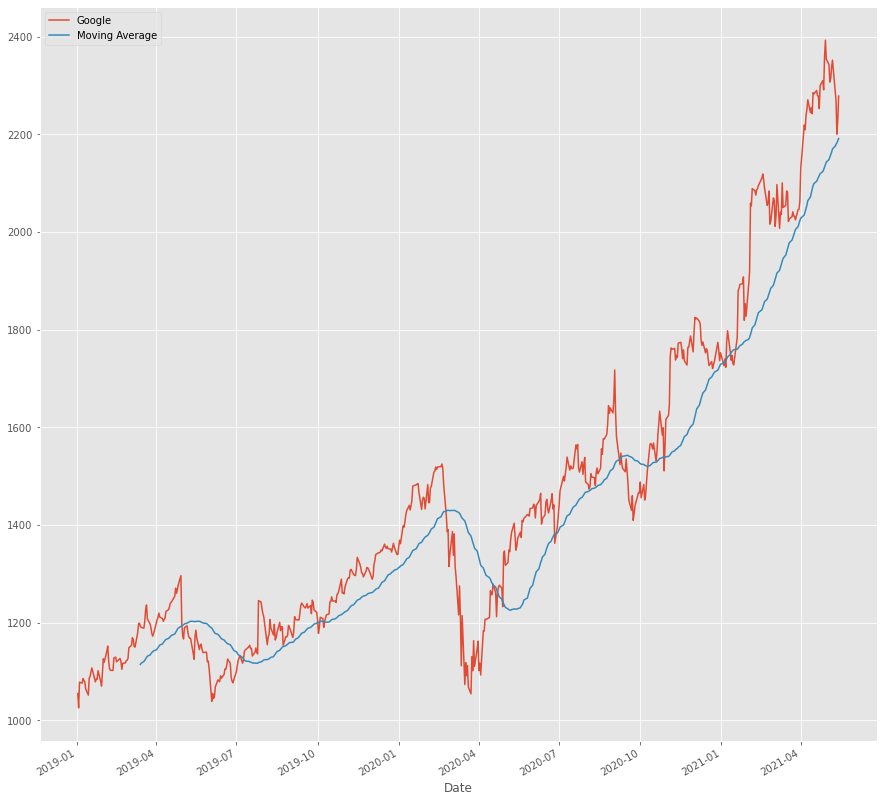

In [27]:
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime.now()

ma = calculate_ma(start_date, end_date, 'GOOGL', 50)

mpl.rc('figure', figsize=(15,15))
style.use('ggplot')
close_px.plot(label='Google')
ma.plot(label='Moving Average')
plt.legend()
plt.show()